# Análise e apresentação de dados

## Preparação para a análise

Sempre que se deseja explorar e extrair informação de um conjunto de dados, é preciso entender, antes, quais tipos de informações é possível obter com os dados disponíveis. De modo geral, os dados se classificam em:

**Dados Numéricos:** Também chamados de quantitativos, são conjuntos de dados que representam contagens ou medidas, por exemplo: Idade, altura, peso. Com esse tipo de dado é possível fazer análises estatísticas e determinar média, desvio padrão, etc. Esses dados se dividem ainda em dois grupos, sendo:


*   **Discretos:** Representados por números inteiros (ex.: Idade).
*   **Contínuos:** Podem assumir qualquer valor real (ex.: peso, altura).

**Dados categóricos:** Também chamados de qualitativos, são conjuntos de dados que refletem características não numéricas, podendo ser:


*   **Ordinais:** Podem ser ordenados de alguma forma que faça sentido (ex.: Faixa etária, estágios de uma doença, datas).
*   **Nominais:** se definem exclusivamente por nomes, sem ordem específica (ex.: grupo sanguíneo, raça, sexo, Sim/não).

### Dados inválidos ou faltantes

Sempre que um conjunto de dados é coletado e posto para análise, um número de atividades precisa ser feito até que de fato seja confiável extrair alguma informação relevante. Nos tópicos anteriores vimos como iniciar a exploração de dados com pandas. Porém, depois de obter nosso dataframe, precisamos checar a integridade dos nossos dados, e limpá-los antes de fazer qualquer análise. De acordo com a [IBM Data Analytics](https://www.ibm.com/cloud/blog/ibm-data-catalog-data-scientists-productivity), 80% do tempo dedicado a um conjunto de dados disponível para análise é gasto com limpeza dos dados.

Uma fase importante na limpeza de dados é o tratamento de dados faltando ou inválidos (pense que, se um dado não serve para a análise, ele está faltando). Vamos utilizar uma [base dados](https://raw.githubusercontent.com/dataoptimal/posts/master/data%20cleaning%20with%20python%20and%20pandas/property%20data.csv) pequena, porém suficiente para entendermos como lidar com dados faltando.  

Execute as células abaixo para importar os dados do exemplo.

In [0]:
import pandas as pd

In [2]:
dados_faltando = pd.read_csv('https://raw.githubusercontent.com/dataoptimal/posts/master/data%20cleaning%20with%20python%20and%20pandas/property%20data.csv',sep=',')
dados_faltando

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


É possível perceber os dados inválidos do dataframe acima. O pandas consegue detectar alguns valores inválidos ou faltantes. Para esses dados, ele utiliza a etiqueta `NaN`.

O Pandas possui um método específico para identificar valores faltantes em uma série, de nome `isnull()`.

In [3]:
dados_faltando['NUM_BATH'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
Name: NUM_BATH, dtype: bool

Perceba que o método `isnull()` retorna `True` sempre que existe um valor faltando no campo avaliado.

Para um conjunto de dados muito grande, é impraticável aplicar a função `isnull()` manualmente a cada característica. Para avaliar a quantidade de valores faltando em todas as características, basta combinar o método `sum()` com o resultado do método `isnull()` aplicado a todo o conjunto de dados.

In [4]:
dados_faltando.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

Nem sempre o Pandas será capaz de identificar um dado inválido. No nosso exemplo, existe um dado inválido `'na'` na série que representa a característica `NUM_BEDROOMS` e outro valor inválido `'--'` na série que representa a característica `SQ_FT`. 

Nesses casos, podemos usar os métodos `unique()` ou `value_counts()` para ver os valores existentes em uma série:

In [5]:
dados_faltando["NUM_BEDROOMS"].unique()

array(['3', nan, '1', '2', 'na'], dtype=object)

In [6]:
dados_faltando["SQ_FT"].value_counts()

800     1
1000    1
950     1
850     1
1600    1
700     1
1800    1
--      1
Name: SQ_FT, dtype: int64

Outro caso de dados inválidos ocorre quando um dado de tipo diferente do esperado para uma dada característica é encontrado. A coluna `OWN_OCCUPIED` deveria conter somente valores no formato `Y` ou `N`. Contudo, em uma das linhas é encontrado o valor `12`, que não tem relação com os valores esperados.

Nesse caso, podemos usar os métodos `isin` e `all` para ver se todos os valores de uma série respeitam o **domínio** de valores previsto para aquela série.

* O método `isin` avalia se um dado nominal está presente em uma lista de opções, convertendo a série original em uma séries de valores `True` (caso esteja) ou `False` (caso contrário).
* O método `all` avalia se todos os valores na série transformada são iguais a `True`.

In [7]:
condição_domínio = dados_faltando["OWN_OCCUPIED"].isin(["Y","N"])
all(condição_domínio)

False

Para identificar quais dados da série `"OWN_OCCUPIED"` ferem a condição informada, invertemos a condição de busca usando o operador `~` (lemos como NÃO):

In [9]:
dados_faltando[~condição_domínio]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950


## Começando a análise

Os dados para esta parte do tutorial serão carregados a partir de uma URL. 

Vamos deixar que o Pandas baixe diretamente o dataset, informando apenas a URL onde ele está localizado.

In [10]:
dados_url = 'http://bit.ly/2cLzoxH'
dados = pd.read_csv(dados_url)
dados.head(n=10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


Uma vez concluída a limpeza dos dados, o primeiro conjunto de ferramentas que podemos usar para analisá-los é a das **estatísticas descritivas**. 

O Pandas oferece as principais medidas **centrais** e de **dispersão**, que podemos ser aplicadas a qualquer série de dados numéricos.

### Medidas centrais

**Média**: A soma de todas as medições divididas pelo número de observações no conjunto de dados.

In [11]:
dados.mean()

year         1.979500e+03
pop          2.960121e+07
lifeExp      5.947444e+01
gdpPercap    7.215327e+03
dtype: float64

**Mediana**: Valor do meio que separa a metade maior da metade menor no conjunto de dados.

In [12]:
dados["year"].median()

1979.5

**Moda**: O(s) valor(es) que aparece(m) com mais frequência no conjunto de dados.

In [13]:
dados["year"].mode()

0     1952
1     1957
2     1962
3     1967
4     1972
5     1977
6     1982
7     1987
8     1992
9     1997
10    2002
11    2007
dtype: int64

### Medidas de dispersão

**Variância**: Indica o espalhamento dos valores de uma série. 

É calculada como a distância média de cada valor de uma série para a média da série. Para que distâncias positivas e negativas não se anulem, cada distância é elevada ao quadrado durante a soma. Por esse motivo, a ordem de grandeza da variância não casa com a ordem de grandeza dos dados da série.

Uma baixa variância indica que os valores da série tendem a estar próximos da média. Uma alta variância indica que os valores da série estão dispersos.

In [14]:
dados["year"].var()

298.0916030534351

**Desvio Padrão**: Raiz quadrada da variância. Mantém todas as suas propriedades, mas apresenta a mesma ordem de grandeza dos dados da série: 

In [15]:
dados["year"].std()

17.265329508973615

**Quantis**: Particionam os valores ordenados de uma série. Um quantil de 25% indica que 25% dos valores da série são inferiores àquele quantil. Por convenção, ***quartis*** são os quantis de 25%, 50% e 75%, também conhecidos como primeiro, segundo e terceiro quartis:


In [16]:
dados["year"].quantile(0.25)

1965.75

In [20]:
primeiro_quartil = dados.query(f"year < {dados['year'].quantile(0.25)}")
primeiro_quartil.shape

(426, 6)

In [21]:
dados.shape

(1704, 6)

### Outros métodos de estatística descritiva

* `describe()`: presente nos objetos `DataFrame` e `Series`, reúne várias medidas descritivas sobre os dados, incluindo os métodos `count()`, `min()` e `max()`:

In [22]:
dados["year"].describe()

count    1704.00000
mean     1979.50000
std        17.26533
min      1952.00000
25%      1965.75000
50%      1979.50000
75%      1993.25000
max      2007.00000
Name: year, dtype: float64

In [23]:
dados.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


* `nunique()`: informa a quantidade de valores distintos.

In [24]:
dados.nunique()

country       142
year           12
pop          1704
continent       5
lifeExp      1626
gdpPercap    1704
dtype: int64

In [25]:
dados["year"].nunique()

12

* `sort_values()`: ordena os valores de um `DataFrame` ou `Series`, em ordem crescente ou decrescente. Ao usar o método `sort_values()` do `DataFrame`, podemos especificar múltiplas colunas para a ordenação. Nesse caso, empates na primeira coluna são resolvidos pela segunda coluna, e assim por diante.

In [26]:
dados["year"].sort_values().head()

0       1952
528     1952
540     1952
1656    1952
552     1952
Name: year, dtype: int64

In [27]:
dados.sort_values(by=['year','country'],ascending=False).head()

,country,year,pop,continent,lifeExp,gdpPercap
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404


## Apresentação dos dados

A análise de medidas centrais e de dispersão do `DataFrame` costuma ser aprofundada pela visualização das séries de dados.

Para começar vamos carregar as bibliotecas necessárias:
- `matplotlib` é uma biblioteca que serve exclusivamente para criar gráficos; 
- `seaborn` é uma biblioteca feita para criar gráficos estatísticos em Python. É construída em cima do Matplotlib e é integrada às estruturas de dados do Pandas.

Por convenção, carregamos apenas o módulo `pyplot` da biblioteca `matplotlib` e o chamamos de `plt`.

No caso do `seaborn`, carregamos toda a biblioteca, a chamamos de `sns` e usamos seu método `set()` para colocar em vigor suas configurações iniciais. 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Histogramas

Com os comandos oferecidos pelo Pandas é fácil construir um histograma. Porém, é necessário entender exatamente o que se está construindo. 

No trecho abaixo dizemos que do conjunto `dados` vamos usar a coluna `lifeExp`, que mostra a expectativa de vida por ano.

Com o método `hist(bins = 100)` teremos o histograma com 100 faixas diferentes de valores. 

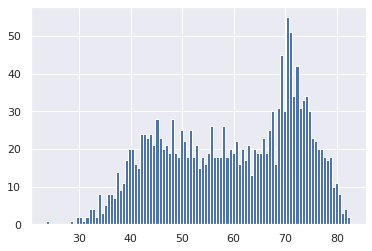

In [29]:
dados['lifeExp'].hist(bins=100)

Abaixo podemos ver o efeito (extremo) de se construir um histograma com poucos intervalos de valores (apenas dois, neste caso).

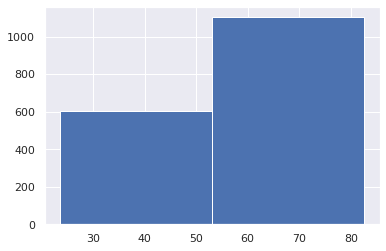

In [30]:
dados['lifeExp'].hist(bins=2)

O caso abaixo é exatamente o inverso do que foi mostrado acima: muitas faixas de valores (1000 no gráfico abaixo) torna a compreensão muito difícil.

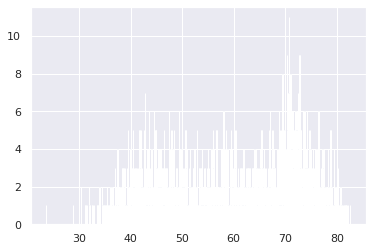

In [31]:
dados['lifeExp'].hist(bins=1000)

O histograma padrão do Pandas é básico e serve apenas para uma olhada rápida na distribuição dos dados, mas não conta a história toda. 

Além de não haver nomes nos eixos X e Y, há uma região do eixo X sendo apresentada mesmo que não haja dados nela.

Podemos resolver isso configurando o histograma através dos seguintes parâmetros:
 - `xlabelsize` e `ylabelsize` ditam o tamanho da fonte nos eixos;
 - `xlabel `e `ylabel` são os métodos que alteram o título do eixo e o tamanho desse texto;
 - `xlim` também é um método e determina os limites inferior e superior do eixo horizontal.

A seguir podemos ver como customizar as informações que aparecem no histograma.

(22.0, 90.0)

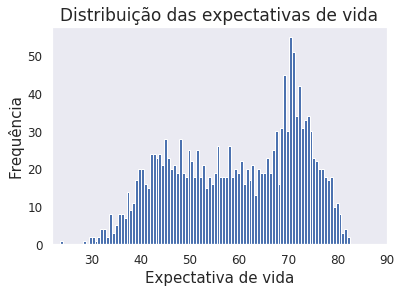

In [32]:
dados['lifeExp'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.title("Distribuição das expectativas de vida", fontsize=17)
plt.xlim([22.0,90.0])

Apesar de ser conveniente usar o método `hist()` diretamente a partir de uma série, o método `distplot()` do `seaborn` é bem mais poderoso.

Além de apresentar um histograma dos dados, o `distplot()` estima uma **distribuição de probabilidade** dos dados:

Text(0.5, 1.0, 'Distribuição das expectativas de vida')

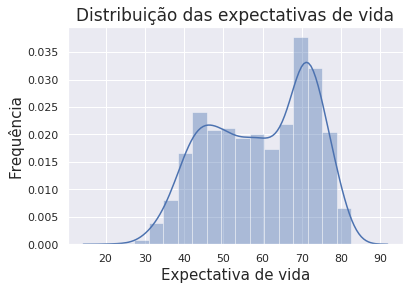

In [33]:
sns.distplot(dados["lifeExp"])
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.title("Distribuição das expectativas de vida", fontsize=17)

A distribuição de probabilidade estimada no gráfico acima é uma importante fonte de informação sobre os dados.

Podemos compará-la com uma **distribuição normal** usando o método `norm` da biblioteca `scipy`:

In [0]:
from scipy.stats import norm

Text(0.5, 1.0, 'Distribuição das expectativas de vida')

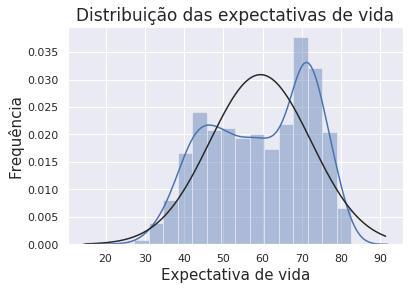

In [35]:
sns.distplot(dados["lifeExp"], fit=norm)
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.title("Distribuição das expectativas de vida", fontsize=17)

Nesse caso, vemos que a distruição real dos dados difere bastante da distribuição normal.

De fato, ela se assemelha mais a uma **distribuição bimodal**, que costuma ocorrer quando os dados apresentam subconjuntos normalmente distribuídos.

As duas células de código a seguir produzem gráficos usando a expectativa de vida no continente Africano e na Europa, respectivamente, mostrando de onde surge a distribuição bimodal do gráfico acima:

Text(0.5, 1.0, 'Distribuição das expectativas de vida nos continentes europeu e africano')

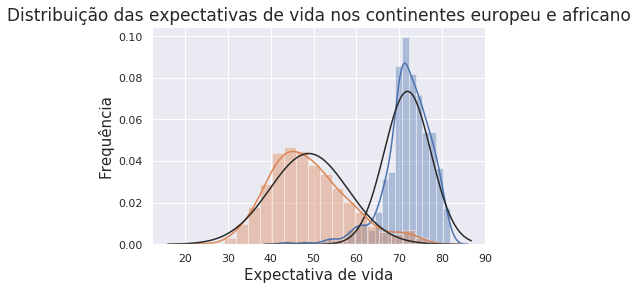

In [38]:
dados_africa = dados.query("continent == 'Africa'")
dados_europa = dados.query("continent == 'Europe'")

sns.distplot(dados_europa["lifeExp"], fit=norm)
sns.distplot(dados_africa["lifeExp"], fit=norm)
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.title("Distribuição das expectativas de vida nos continentes europeu e africano", fontsize=17)

Além de interessante do ponto de vista estatístico, o gráfico acima é socialmente impactante e preocupante, tamanha a diferença nas distribuições.

### Boxplots e violin plots

Outros tipos de gráfico úteis para análise de distribuições são obtidos pelos métodos `boxplot()` e `violinplot()` do `seaborn`. 

**Boxplot**: apresenta os quartis de uma série, representados por uma caixa - as extremidades são o primeiro e terceiro quartil, enquanto a divisória dentro da caixa é o segundo quartil. 

Esse tipo de gráfico também é conhecido como caixas e bigodes (box-and-whiskers), porque os elementos mínimo e máximo são representados pelos "bigodes" da caixa. 

Uma particularidade desse gráfico é que os elementos mínimo e máximo são calculados em função da distância entre o primeiro e o terceiro quartil. Assim, valores da série que extrapolem esses valores extremos são considerados outliers e aparecem no boxplot como pontos.

Text(0.5, 1.0, 'Expectativa de vida por continente')

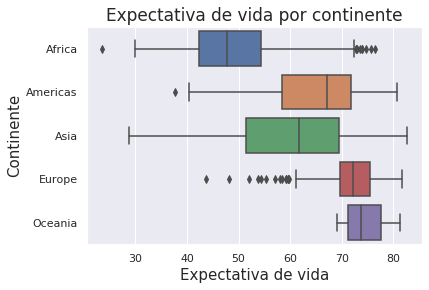

In [37]:
sns.boxplot(x="lifeExp", y="continent", data=dados.sort_values("continent"))
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Continente",fontsize=15)
plt.title("Expectativa de vida por continente", fontsize=17)

Como podemos ver, a África é o continente com menor expectativa de vida em geral, enquanto a Ásia é o continente onde esse dado apresenta maior dispersão.

Nos gráficos acima, é possível notar que existem muitos outliers.

É interessante filtrar os dados e analisar a expectativa de vida por ano (por exemplo). 

O código abaixo produz um boxplot da expectativa de vida para o ano de 2007:

Text(0.5, 1.0, 'Expectativa de vida por continente (2007)')

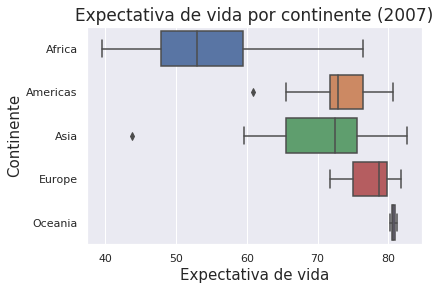

In [40]:
dados_2007 = dados.query("year == 2007")
sns.boxplot(x="lifeExp", y="continent", data=dados_2007.sort_values("continent"))
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Continente",fontsize=15)
plt.title("Expectativa de vida por continente (2007)", fontsize=17)

Delimitando o ano da análise, vemos bem menos outliers.

* **Violin plots**: combinam as informações presentes em um boxplot e em gráficos de densidade. Apesar de serem extremamente ricos em informação, são pouco difundidos na prática. 

Text(0.5, 1.0, 'Expectativa de vida por continente')

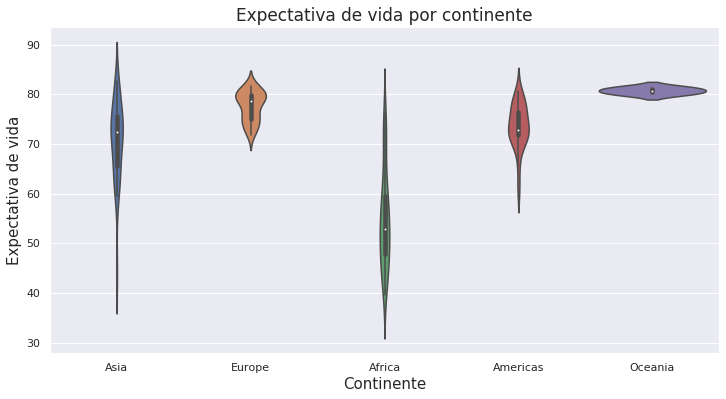

In [42]:
plt.figure(figsize=(12,6))
sns.violinplot(x="continent", y="lifeExp", data=dados_2007)
plt.xlabel("Continente", fontsize=15)
plt.ylabel("Expectativa de vida",fontsize=15)
plt.title("Expectativa de vida por continente", fontsize=17)